## Final Project Submission

Please fill out:
* Student name: guy muchnick 
* Student pace: self paced
* Scheduled project review date/time: 
* Instructor name: Abhineet Kulkarni
* Blog post URL:https://medium.com/@guymu15/sql-and-pandas-complimenting-tools-for-data-manipulation-3851e7e9c87b


# Movie Preformence Analysis  

## Overview

this project analyzes the data found in the tn.movie_budgets.csv, imdb.title.basics.csv, tmdb.movies.csv regarding movies performance. descriptive analysis of the of movies production cost, income and rating.  

## business problem

Production companies may be able to improve their investment to profits ratio by understanding the connection between them. doing so will allow them to use their money smarter. 
Also by catagorizing the data by genre production compenies can detect which gnre is more profitable for them and invest their money more wisely.
Lastly by trying to find patterns in actors and the movie's preformance in specific genre a smarter usage of actors can be used to increase the return of the investment. 

## data understanding

our databases hold records of movies preformance since an early stage of the industry. each movie is IDed by its name and provide wide range of data about the movie.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
budget_returns = pd.read_csv('./zippedData/tn.movie_budgets.csv.gz')
basic_data = pd.read_csv('./zippedData/imdb.title.basics.csv.gz')
rating = pd.read_csv('./zippedData/tmdb.movies.csv.gz')

before joining our dataframes we'll need to see how the our represented,
in the next few cells I'll present the dataframes so I'll be able to strategize their join

In [3]:
budget_returns

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [4]:
basic_data


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


## data cleaning

after seeing the structure of each dataframe i can see that the only way to join them is by movie name. 
although name is not the best option as it susceptible to changes of letter case and symbols from one side but 
is hard to clean as a movie can have a name which is symbol/case sensitive, a good example for this is the movie #horror
that without the # won't be identifiable.

In [5]:
#for the first stage we'll have to join budget_returns and basic_data, both of 
#them contain vital data inner join is the best choice here, as we need the 
#full data set and incomplete data won't be useable
full_monitery = budget_returns.set_index('movie').join(
    basic_data.set_index('primary_title'), how = 'left')
full_monitery

,id,release_date,production_budget,domestic_gross,worldwide_gross,tconst,original_title,start_year,runtime_minutes,genres
#Horror,16,"Nov 20, 2015","$1,500,000",$0,$0,tt3526286,#Horror,2015.0,101.0,"Crime,Drama,Horror"
(500) Days of Summer,55,"Jul 17, 2009","$7,500,000","$32,425,665","$34,439,060",NaN,NaN,NaN,NaN,NaN
10 Cloverfield Lane,54,"Mar 11, 2016","$5,000,000","$72,082,999","$108,286,422",tt1179933,10 Cloverfield Lane,2016.0,103.0,"Drama,Horror,Mystery"
10 Days in a Madhouse,48,"Nov 11, 2015","$12,000,000","$14,616","$14,616",tt3453052,10 Days in a Madhouse,2015.0,111.0,Drama
10 Things I Hate About You,63,"Mar 31, 1999","$13,000,000","$38,177,966","$60,413,950",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
mother!,59,"Sep 15, 2017","$30,000,000","$17,800,004","$42,531,076",NaN,NaN,NaN,NaN,NaN
xXx,98,"Aug 9, 2002","$70,000,000","$141,930,000","$267,200,000",NaN,NaN,NaN,NaN,NaN
xXx: Return of Xander Cage,15,"Jan 20, 2017","$85,000,000","$44,898,413","$345,033,359",tt1293847,xXx: Return of Xander Cage,2017.0,107.0,"Action,Adventure,Thriller"
Ã l\'intÃ©rieur,57,"Apr 15, 2008","$3,000,000",$0,"$895,932",NaN,NaN,NaN,NaN,NaN


In [6]:
#now we add the rating of the movies and at this point we should remove 
#duplicates, we'll use budget_returns data setas our basic data, and remove 
#conflicting data fron the other data sets.
full_monitery_and_rating = full_monitery.join(
    rating.set_index('title'),how = 'inner', rsuffix = 'r_').reset_index()
full_monitery_and_rating = full_monitery_and_rating.rename(
    columns = {'index':'title'})
full_monitery_and_rating = full_monitery_and_rating.drop_duplicates(
    subset = 'title')
full_monitery_and_rating

,title,id,release_date,production_budget,domestic_gross,worldwide_gross,tconst,original_title,start_year,runtime_minutes,genres,Unnamed: 0,genre_ids,idr_,original_language,original_titler_,popularity,release_dater_,vote_average,vote_count
0,#Horror,16,"Nov 20, 2015","$1,500,000",$0,$0,tt3526286,#Horror,2015.0,101.0,"Crime,Drama,Horror",14656,"[18, 9648, 27, 53]",301325,de,#Horror,6.099,2015-11-20,3.3,102
1,10 Cloverfield Lane,54,"Mar 11, 2016","$5,000,000","$72,082,999","$108,286,422",tt1179933,10 Cloverfield Lane,2016.0,103.0,"Drama,Horror,Mystery",17422,"[53, 878, 18]",333371,en,10 Cloverfield Lane,17.892,2016-03-11,6.9,4629
2,10 Days in a Madhouse,48,"Nov 11, 2015","$12,000,000","$14,616","$14,616",tt3453052,10 Days in a Madhouse,2015.0,111.0,Drama,15907,[18],345003,en,10 Days in a Madhouse,0.955,2015-11-20,5.4,7
3,12 Strong,64,"Jan 19, 2018","$35,000,000","$45,819,713","$71,118,378",tt1413492,12 Strong,2018.0,130.0,"Action,Drama,History",24032,"[10752, 18, 36, 28]",429351,en,12 Strong,13.183,2018-01-19,5.6,1312
4,12 Years a Slave,18,"Oct 18, 2013","$20,000,000","$56,671,993","$181,025,343",tt2024544,12 Years a Slave,2013.0,134.0,"Biography,Drama,History",7911,"[18, 36]",76203,en,12 Years a Slave,16.493,2013-10-30,7.9,6631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4689,Zoolander 2,64,"Feb 12, 2016","$50,000,000","$28,848,693","$55,348,693",tt1608290,Zoolander 2,2016.0,101.0,Comedy,17483,[35],329833,en,Zoolander 2,12.997,2016-02-12,4.7,1374
4690,Zoom,26,"Aug 11, 2006","$35,000,000","$11,989,328","$12,506,188",tt3763866,Zoom,2015.0,96.0,"Animation,Comedy,Drama",18195,"[16, 35, 18]",351065,en,Zoom,3.434,2016-09-02,5.5,43
4694,Zootopia,57,"Mar 4, 2016","$150,000,000","$341,268,248","$1,019,429,616",tt2948356,Zootopia,2016.0,108.0,"Adventure,Animation,Comedy",17391,"[16, 12, 10751, 35]",269149,en,Zootopia,27.549,2016-03-04,7.7,9977
4695,mother!,59,"Sep 15, 2017","$30,000,000","$17,800,004","$42,531,076",NaN,NaN,NaN,NaN,NaN,20707,"[18, 27, 9648]",381283,en,mother!,15.227,2017-09-15,7.0,3458


In [7]:
#we don't need all the included data, some of it is duplicate from different 
#datasets and some is just not usefull for us.
cleared_data = full_monitery_and_rating.drop(
    full_monitery_and_rating.columns.difference(
    ['title','production_budget','worldwide_gross','genres','vote_average']),
    1)
cleared_data

,title,production_budget,worldwide_gross,genres,vote_average
0,#Horror,"$1,500,000",$0,"Crime,Drama,Horror",3.3
1,10 Cloverfield Lane,"$5,000,000","$108,286,422","Drama,Horror,Mystery",6.9
2,10 Days in a Madhouse,"$12,000,000","$14,616",Drama,5.4
3,12 Strong,"$35,000,000","$71,118,378","Action,Drama,History",5.6
4,12 Years a Slave,"$20,000,000","$181,025,343","Biography,Drama,History",7.9
...,...,...,...,...,...
4689,Zoolander 2,"$50,000,000","$55,348,693",Comedy,4.7
4690,Zoom,"$35,000,000","$12,506,188","Animation,Comedy,Drama",5.5
4694,Zootopia,"$150,000,000","$1,019,429,616","Adventure,Animation,Comedy",7.7
4695,mother!,"$30,000,000","$42,531,076",NaN,7.0


In [8]:
#let's see if we have na in our data
cleared_data.isna().sum()

title                  0
production_budget      0
worldwide_gross        0
genres               146
vote_average           0
dtype: int64

In [9]:
#as genre data cant be used in a statistical way we have no real option but 
#removing those movies as we lack data on them
cleared_data.dropna(inplace = True)
cleared_data.isna().sum()

title                0
production_budget    0
worldwide_gross      0
genres               0
vote_average         0
dtype: int64

In [10]:
cleared_data['production_budget'] = cleared_data['production_budget'].str.replace(
    '$','').str.replace(',','').astype('int64')
cleared_data['worldwide_gross'] = cleared_data['worldwide_gross'].str.replace(
    '$','').str.replace(',','').astype('int64')
cleared_data

,title,production_budget,worldwide_gross,genres,vote_average
0,#Horror,1500000,0,"Crime,Drama,Horror",3.3
1,10 Cloverfield Lane,5000000,108286422,"Drama,Horror,Mystery",6.9
2,10 Days in a Madhouse,12000000,14616,Drama,5.4
3,12 Strong,35000000,71118378,"Action,Drama,History",5.6
4,12 Years a Slave,20000000,181025343,"Biography,Drama,History",7.9
...,...,...,...,...,...
4688,Zookeeper,80000000,170805525,"Comedy,Family,Romance",5.3
4689,Zoolander 2,50000000,55348693,Comedy,4.7
4690,Zoom,35000000,12506188,"Animation,Comedy,Drama",5.5
4694,Zootopia,150000000,1019429616,"Adventure,Animation,Comedy",7.7


In [11]:
cleared_data.drop(
    cleared_data.loc[cleared_data['worldwide_gross']==0].index, inplace=True)

## general profit per investment

let's try and see how a scatter plot of profit per investment will look like and if we  an notice any
obvious trends

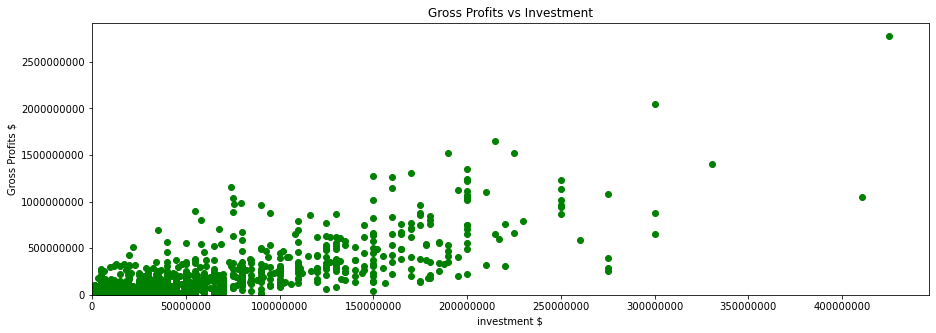

In [12]:
fig1, ax1 = plt.subplots(figsize=(15,5))
ax1.scatter(
    cleared_data["production_budget"], 
    cleared_data["worldwide_gross"], color="green");
ax1.ticklabel_format(style='plain')
ax1.set_ylim(ymin=0)
ax1.set_xlim(xmin=0)
ax1.set_title("Gross Profits vs Investment")
ax1.set_xlabel("investment $")
ax1.set_ylabel("Gross Profits $");
plt.savefig("graphs\Gross Profits vs Investment.png",
            bbox_inches='tight', dpi=600)

the only discernible trend is that most movies investments are less than 100,000,000$ and most of the gross profits for those movies are under 5,000,000,000

In [13]:
cleared_data["production_budget"].agg(['count', 'median', 'mean','min','max'])

count     1.632000e+03
median    2.200000e+07
mean      4.247776e+07
min       9.000000e+03
max       4.250000e+08
Name: production_budget, dtype: float64

In [14]:
cleared_data["worldwide_gross"].agg(['count', 'median', 'mean','min','max'])

count     1.632000e+03
median    4.661594e+07
mean      1.333133e+08
min       2.600000e+01
max       2.776345e+09
Name: worldwide_gross, dtype: float64

In [15]:
cleared_data['value_per_investment'] = (cleared_data['worldwide_gross'] /
                                        cleared_data['production_budget'])
cleared_data

,title,production_budget,worldwide_gross,genres,vote_average,value_per_investment
1,10 Cloverfield Lane,5000000,108286422,"Drama,Horror,Mystery",6.9,21.657284
2,10 Days in a Madhouse,12000000,14616,Drama,5.4,0.001218
3,12 Strong,35000000,71118378,"Action,Drama,History",5.6,2.031954
4,12 Years a Slave,20000000,181025343,"Biography,Drama,History",7.9,9.051267
5,127 Hours,18000000,60217171,"Adventure,Biography,Drama",7.0,3.345398
...,...,...,...,...,...,...
4688,Zookeeper,80000000,170805525,"Comedy,Family,Romance",5.3,2.135069
4689,Zoolander 2,50000000,55348693,Comedy,4.7,1.106974
4690,Zoom,35000000,12506188,"Animation,Comedy,Drama",5.5,0.357320
4694,Zootopia,150000000,1019429616,"Adventure,Animation,Comedy",7.7,6.796197


In [16]:
cleared_data["vote_average"].agg(['count', 'median', 'mean','min','max'])

count     1632.000000
median       6.300000
mean         6.257782
min          0.000000
max         10.000000
Name: vote_average, dtype: float64

In [17]:
cleared_data["value_per_investment"].agg(
    ['count', 'median', 'mean','min','max'])

count     1632.000000
median       2.075969
mean         3.885146
min          0.000026
max        416.564740
Name: value_per_investment, dtype: float64

## relations between rating and profits
after organizing the required data we can now try and find a trend connecting rating and value per investment.   

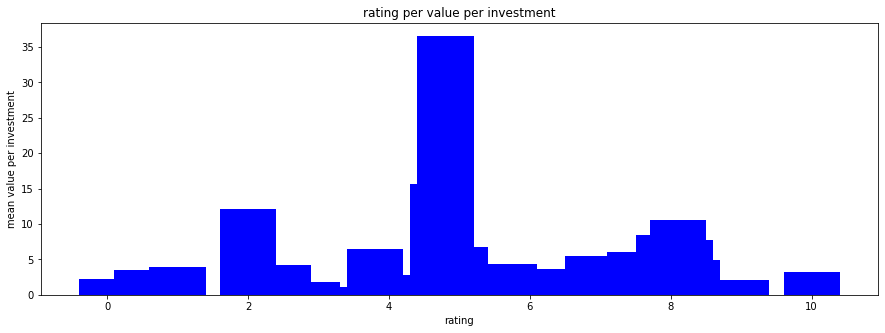

In [18]:
vote_vpi_mean = cleared_data["value_per_investment"].groupby(
    cleared_data["vote_average"]).agg(['mean'])
vote_vpi_mean = vote_vpi_mean.reset_index()
fig, ax = plt.subplots(figsize=(15,5))
ax.bar(vote_vpi_mean["vote_average"],vote_vpi_mean["mean"],color = 'blue')
ax.set_title("rating per value per investment")
ax.set_xlabel("rating")
ax.set_ylabel("mean value per investment");
plt.savefig("graphs\Rating_per_value_per_investment.png")

As we can see in the bar plot above there doesn't seem to be any trend connecting rating and value per investment.

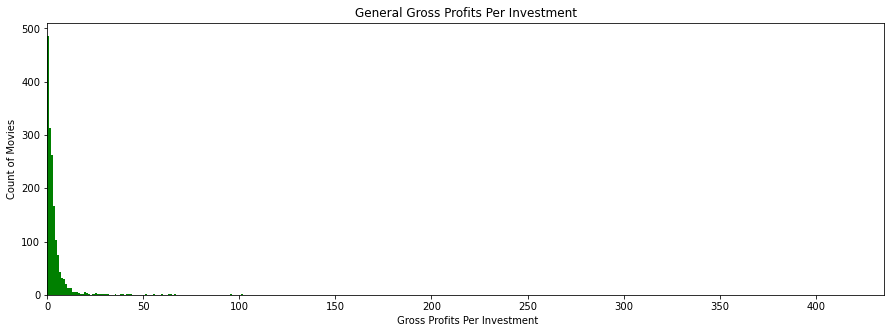

In [19]:
fig2, ax2 = plt.subplots(figsize=(15,5))
bins1 = range(int(cleared_data["value_per_investment"].min()), 
             int(cleared_data["value_per_investment"].max()))
ax2.hist(
    x = cleared_data["value_per_investment"],
    bins = bins1,
    color = 'green')
ax2.set_xlim(xmin=0)
ax2.set_title("General Gross Profits Per Investment")
ax2.set_xlabel(" Gross Profits Per Investment")
ax2.set_ylabel("Count of Movies");
plt.savefig("graphs\General Gross Profits Per Investment.png",
            bbox_inches='tight', dpi=600)

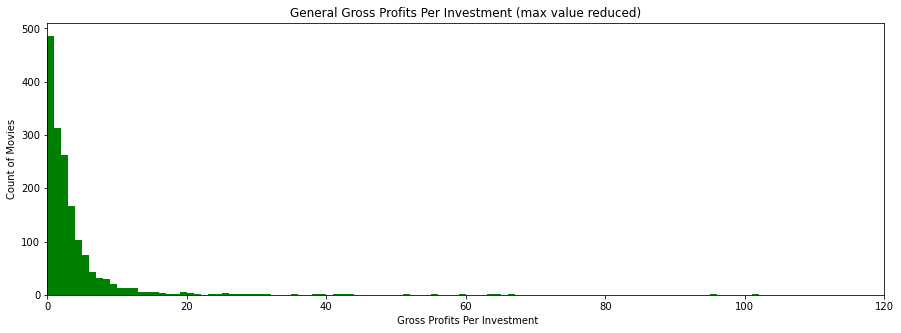

In [20]:
fig2, ax2 = plt.subplots(figsize=(15,5))
bins1 = range(int(cleared_data["value_per_investment"].min()), 
             int(cleared_data["value_per_investment"].max()))
ax2.hist(
    x = cleared_data["value_per_investment"],
    bins = bins1,
    color = 'green')
ax2.set_xlim(xmin=0,xmax=120)
ax2.set_title("General Gross Profits Per Investment (max value reduced)")
ax2.set_xlabel(" Gross Profits Per Investment")
ax2.set_ylabel("Count of Movies");
plt.savefig("graphs\General Gross Profits Per Investment (max value reduced).png",
            bbox_inches='tight', dpi=600)

## general rating per investment

In [21]:
cleared_data[cleared_data["value_per_investment"] < 1]

,title,production_budget,worldwide_gross,genres,vote_average,value_per_investment
2,10 Days in a Madhouse,12000000,14616,Drama,5.4,0.001218
7,13 Sins,4000000,47552,"Horror,Thriller",6.3,0.011888
16,23 Blast,1000000,549185,"Drama,Family,Sport",6.5,0.549185
17,3,7200000,295492,"Comedy,Drama,Romance",6.0,0.041041
23,3 Backyards,300000,39475,Drama,4.3,0.131583
...,...,...,...,...,...,...
4622,Won't Back Down,19000000,5745503,Drama,6.3,0.302395
4655,Wuthering Heights,8000000,2721534,"Drama,Romance",6.1,0.340192
4660,Yoga Hosers,5000000,22958,"Action,Comedy,Fantasy",4.5,0.004592
4666,Your Highness,50000000,26121638,"Adventure,Comedy,Fantasy",3.0,0.522433


In [22]:
cleared_data['rating_per_investment'] = (cleared_data['vote_average'] /
                                        (cleared_data['production_budget']/
                                        1000000))
cleared_data

,title,production_budget,worldwide_gross,genres,vote_average,value_per_investment,rating_per_investment
1,10 Cloverfield Lane,5000000,108286422,"Drama,Horror,Mystery",6.9,21.657284,1.380000
2,10 Days in a Madhouse,12000000,14616,Drama,5.4,0.001218,0.450000
3,12 Strong,35000000,71118378,"Action,Drama,History",5.6,2.031954,0.160000
4,12 Years a Slave,20000000,181025343,"Biography,Drama,History",7.9,9.051267,0.395000
5,127 Hours,18000000,60217171,"Adventure,Biography,Drama",7.0,3.345398,0.388889
...,...,...,...,...,...,...,...
4688,Zookeeper,80000000,170805525,"Comedy,Family,Romance",5.3,2.135069,0.066250
4689,Zoolander 2,50000000,55348693,Comedy,4.7,1.106974,0.094000
4690,Zoom,35000000,12506188,"Animation,Comedy,Drama",5.5,0.357320,0.157143
4694,Zootopia,150000000,1019429616,"Adventure,Animation,Comedy",7.7,6.796197,0.051333


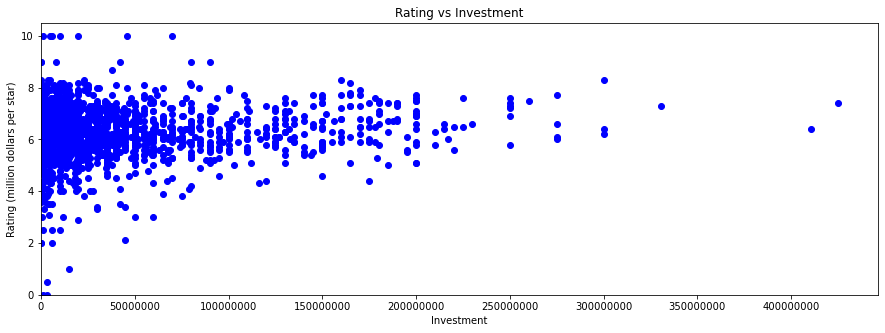

In [23]:
fig1, ax3 = plt.subplots(figsize=(15,5))
ax3.scatter(
    cleared_data["production_budget"], 
    cleared_data["vote_average"], color="blue");
ax3.ticklabel_format(style='plain')
ax3.set_ylim(ymin=0)
ax3.set_xlim(xmin=0)
ax3.set_title("Rating vs Investment")
ax3.set_xlabel("Investment")
ax3.set_ylabel("Rating (million dollars per star)");
plt.savefig("graphs\Rating vs Investment.png",
            bbox_inches='tight', dpi=600)

In [24]:
cleared_data["vote_average"].agg(
    ['count', 'median', 'mean','min','max'])

count     1632.000000
median       6.300000
mean         6.257782
min          0.000000
max         10.000000
Name: vote_average, dtype: float64

by seeing the scatter plot and checking the median we can see that the more we invest the movies tend to get
the same rating and the most spread we see is on small investments.

In [25]:
cleared_data["rating_per_investment"].agg(
    ['count', 'median', 'mean','min','max'])

count     1632.000000
median       0.272111
mean         2.644860
min          0.000000
max        600.000000
Name: rating_per_investment, dtype: float64

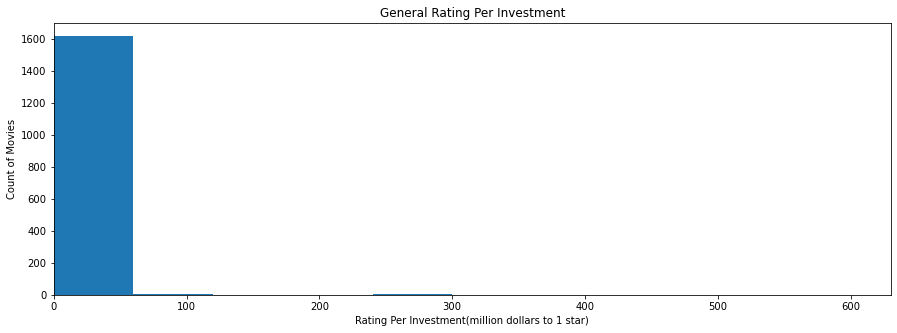

In [26]:
fig4, ax4 = plt.subplots(figsize=(15,5))
ax4.hist(
    x = cleared_data["rating_per_investment"], log = False)
ax4.set_xlim(xmin=0)
ax4.set_title("General Rating Per Investment")
ax4.set_xlabel("Rating Per Investment(million dollars to 1 star)")
ax4.set_ylabel("Count of Movies");
plt.savefig("graphs\Rating Per Investment(million dollars to 1 star).png",
            bbox_inches='tight', dpi=600)

as we can see here, there is not much change in the rating per investment as the magnitude of the investment dwarfs the
rating scale.

In [27]:
cleared_data["genres"].value_counts()

Drama                         89
Comedy,Drama,Romance          61
Adventure,Animation,Comedy    61
Comedy,Drama                  56
Comedy                        53
                              ..
Crime,Horror,Thriller          1
Horror,Music,Thriller          1
Comedy,Sport                   1
Comedy,Fantasy,Sci-Fi          1
Adventure,Drama,Western        1
Name: genres, Length: 252, dtype: int64

## dividing into genres

In [28]:
# in order to split each genre cell to indevidual genres i have used a 
# function i found here https://www.py4u.net/discuss/11964
cleared_data_gsplit = (cleared_data.set_index(
    ['title','production_budget','worldwide_gross','vote_average',
    'value_per_investment','rating_per_investment'])
   .apply(lambda x: x.str.split(',').explode())
   .reset_index())                                                   
cleared_data_gsplit

,title,production_budget,worldwide_gross,vote_average,value_per_investment,rating_per_investment,genres
0,10 Cloverfield Lane,5000000,108286422,6.9,21.657284,1.380000,Drama
1,10 Cloverfield Lane,5000000,108286422,6.9,21.657284,1.380000,Horror
2,10 Cloverfield Lane,5000000,108286422,6.9,21.657284,1.380000,Mystery
3,10 Days in a Madhouse,12000000,14616,5.4,0.001218,0.450000,Drama
4,12 Strong,35000000,71118378,5.6,2.031954,0.160000,Action
...,...,...,...,...,...,...,...
4032,Zootopia,150000000,1019429616,7.7,6.796197,0.051333,Animation
4033,Zootopia,150000000,1019429616,7.7,6.796197,0.051333,Comedy
4034,xXx: Return of Xander Cage,85000000,345033359,5.6,4.059216,0.065882,Action
4035,xXx: Return of Xander Cage,85000000,345033359,5.6,4.059216,0.065882,Adventure


In [29]:
cleared_data_gsplit["genres"].value_counts()

Drama          825
Comedy         526
Action         433
Adventure      342
Thriller       275
Crime          241
Romance        213
Horror         194
Biography      145
Sci-Fi         138
Mystery        127
Fantasy        125
Animation      101
Family          94
Documentary     78
History         54
Music           49
Sport           36
War             21
Western         11
Musical          8
News             1
Name: genres, dtype: int64

In [30]:
cleared_data_gsplit.to_csv('./zippedData/cleared_data_gsplit.csv')

after dividing the data the separate genres let try and extract some statistical data, which genre will be most profitable on average? what genre has the biggest max profit ratio?

In [31]:
!pip install pandasql

In [32]:
from pandasql import sqldf

## genres profit per investment

In [33]:
q1 = """SELECT genres, AVG(value_per_investment), COUNT(title)
       FROM cleared_data_gsplit
       GROUP BY genres
       ORDER BY  AVG(value_per_investment) DESC;"""
vpi = sqldf(q1,locals())
vpi

,genres,AVG(value_per_investment),COUNT(title)
0,Mystery,10.372646,127
1,Horror,9.212387,194
2,Thriller,6.720030,275
3,News,3.894215,1
4,Animation,3.856477,101
5,Romance,3.811516,213
6,Sci-Fi,3.550328,138
7,Biography,3.387715,145
8,Comedy,3.379373,526
9,Music,3.355817,49


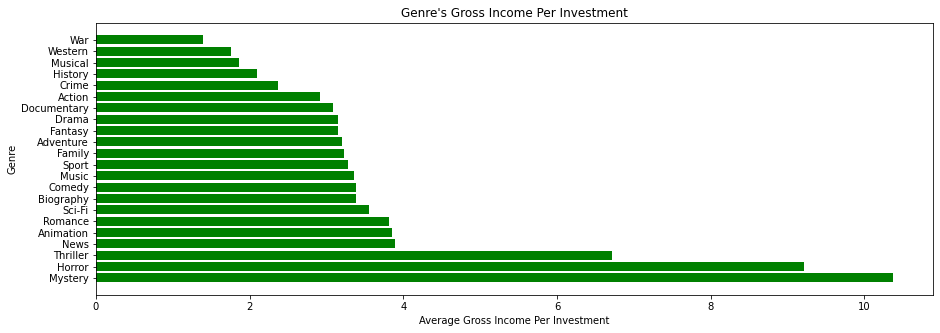

In [34]:
fig5, ax5 = plt.subplots(figsize=(15,5))
ax5.barh(
    vpi['genres'], 
    vpi["AVG(value_per_investment)"],
    color = 'green')
ax5.set_title("Genre's Gross Income Per Investment")
ax5.set_xlabel("Average Gross Income Per Investment")
ax5.set_ylabel("Genre");
plt.savefig("graphs\Genre's Gross Income Per Investment.png",
            bbox_inches='tight', dpi=600)

it's apparent that some genres give better value for their investment, the best value, which is visible in the bar plot above , are mystery, horror and thriller, so its safe to assume that if we made a movie from any of those genres or even all of them together we will get to best profit for our investment.   

## genres rating per investment

In [35]:
q2 = """SELECT genres, AVG(rating_per_investment), COUNT(title)
       FROM cleared_data_gsplit
       GROUP BY genres
       ORDER BY  AVG(rating_per_investment) DESC;"""
rpi = sqldf(q2,locals())
rpi

,genres,AVG(rating_per_investment),COUNT(title)
0,Documentary,6.971735,78
1,Mystery,3.953758,127
2,Horror,3.658767,194
3,Drama,3.451947,825
4,Comedy,2.684111,526
5,Romance,2.649359,213
6,Thriller,2.109479,275
7,Sport,2.094665,36
8,Music,1.933999,49
9,Sci-Fi,1.597501,138


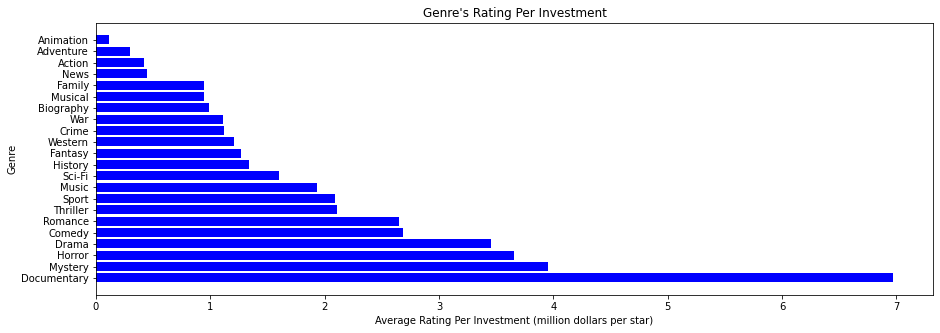

In [36]:
fig6, ax6 = plt.subplots(figsize=(15,5))
ax6.barh(
    rpi['genres'], 
    rpi["AVG(rating_per_investment)"],
    color = 'blue')
ax6.set_title("Genre's Rating Per Investment")
ax6.set_xlabel("Average Rating Per Investment (million dollars per star)")
ax6.set_ylabel("Genre");
plt.savefig("graphs\Genre's Rating Per Investment.png",
            bbox_inches='tight', dpi=600)

we can see that documentary movies tend to get the best rating for their investment which is not consistent with our observations from the profit for investment plot. although we have this inconsistency we can see that the 2 categories that come after are the 2 most profitable ones from what we have seen before. 

## conclusions
from the data we analyzed we can see that the genres that will get us the best value for our investment are mystery and horror, they have the best profit for investment and also have high rating for investment.
in case we would be interested in prioretizing rating over profit it'd be better to make a documentry or at least add a documentery element to it.
on  the other end if we prioretize profits over rating adding thriller elements to our movie would be advisable.